KNN Model Accuracy: 0.9474
KNN Model Precision: 0.9577
KNN Model Recall: 0.9577
KNN Model F1 Score: 0.9577
KNN Confusion Matrix:
 [[40  3]
 [ 3 68]]


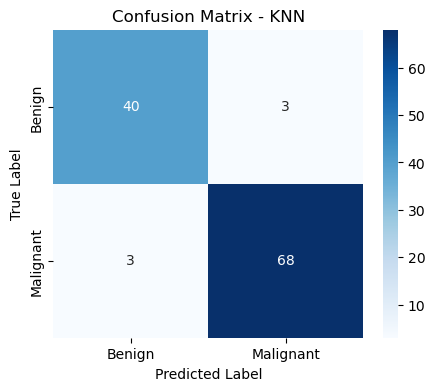

Decision Tree Model Accuracy: 0.9474
Decision Tree Model Precision: 0.9577
Decision Tree Model Recall: 0.9577
Decision Tree Model F1 Score: 0.9577
Decision Tree Confusion Matrix:
 [[40  3]
 [ 3 68]]


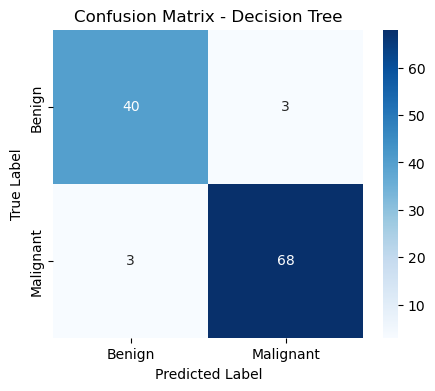

Random Forest Model Accuracy: 0.9649
Random Forest Model Precision: 0.9589
Random Forest Model Recall: 0.9859
Random Forest Model F1 Score: 0.9722
Random Forest Confusion Matrix:
 [[40  3]
 [ 1 70]]


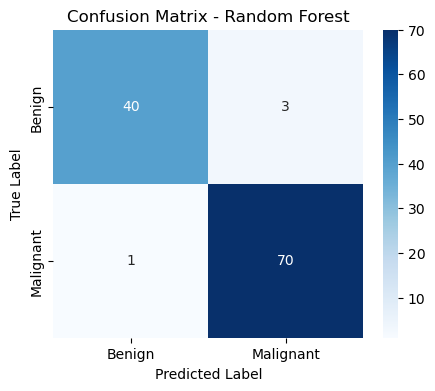

KNN (n_neighbors=10) Model Accuracy: 0.9561
KNN (n_neighbors=10) Model Precision: 0.9714
KNN (n_neighbors=10) Model Recall: 0.9577
KNN (n_neighbors=10) Model F1 Score: 0.9645
KNN (n_neighbors=10) Confusion Matrix:
 [[41  2]
 [ 3 68]]


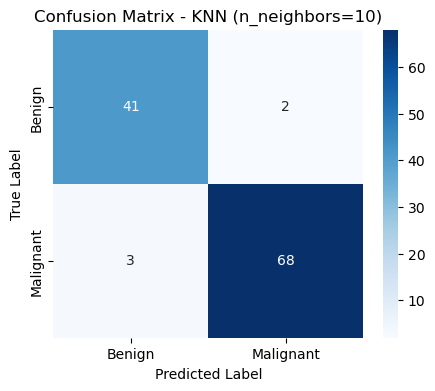

Decision Tree (max_depth=8) Model Accuracy: 0.9474
Decision Tree (max_depth=8) Model Precision: 0.9577
Decision Tree (max_depth=8) Model Recall: 0.9577
Decision Tree (max_depth=8) Model F1 Score: 0.9577
Decision Tree (max_depth=8) Confusion Matrix:
 [[40  3]
 [ 3 68]]


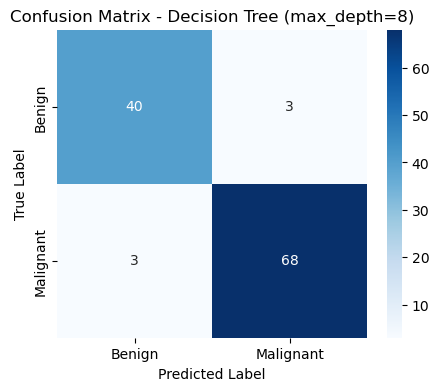

Random Forest (max_depth=10) Model Accuracy: 0.9649
Random Forest (max_depth=10) Model Precision: 0.9589
Random Forest (max_depth=10) Model Recall: 0.9859
Random Forest (max_depth=10) Model F1 Score: 0.9722
Random Forest (max_depth=10) Confusion Matrix:
 [[40  3]
 [ 1 70]]


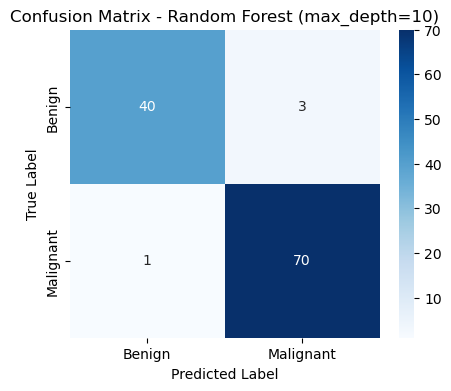

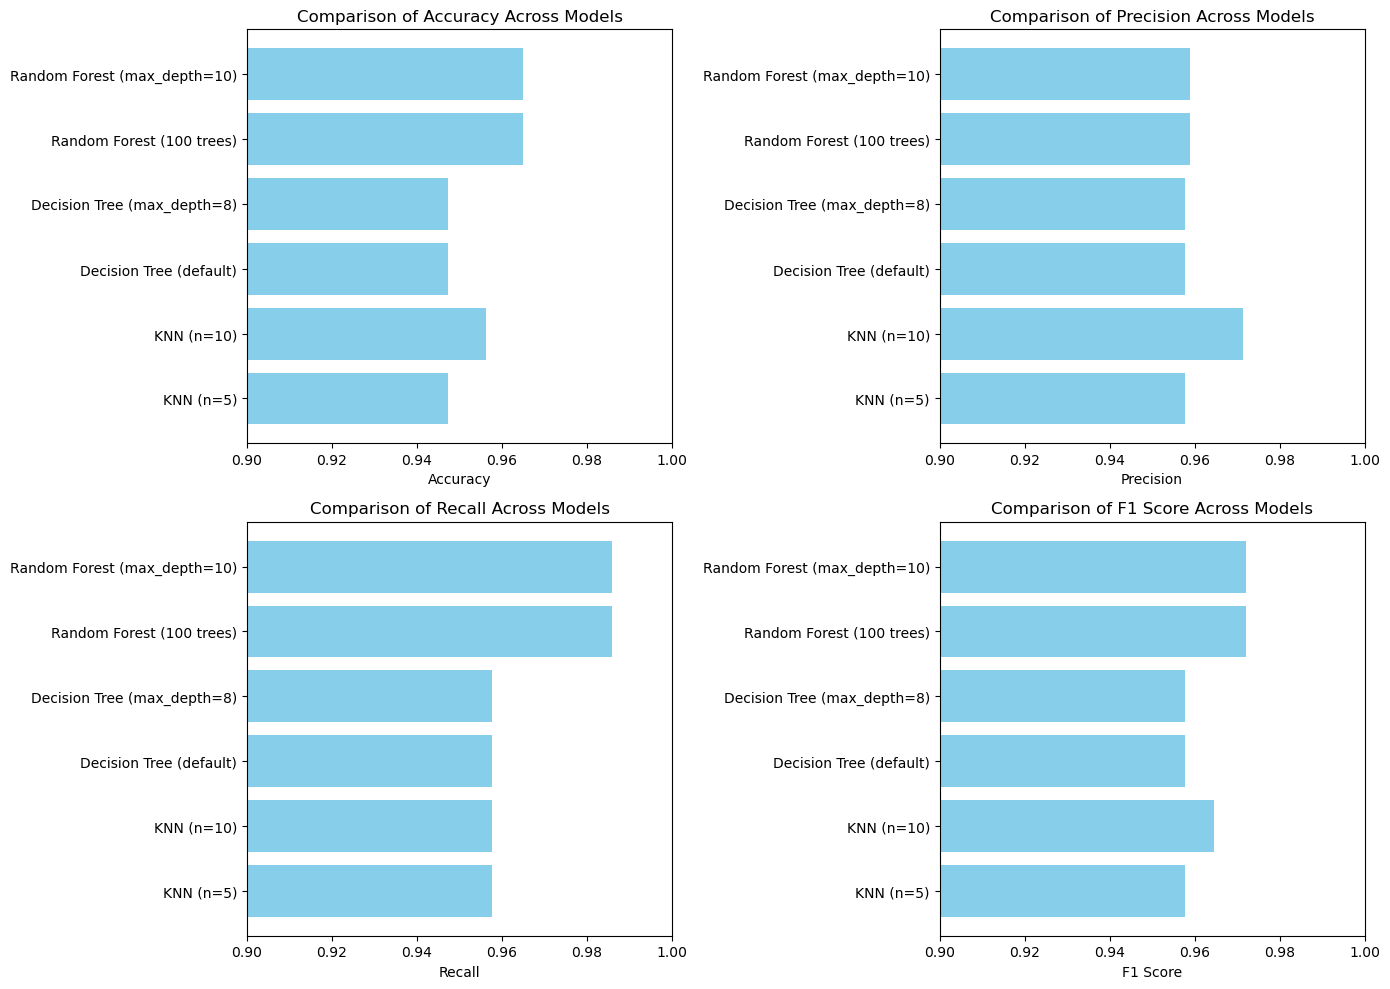

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# include graphs 

# load the data set
X, y = load_breast_cancer(return_X_y=True)

# partition data to 80% training data and 20% test data
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features using StandardScaler for KNN
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model training 
# KNN, 5 neighbors 
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Decision tree, default settings
dct_model = DecisionTreeClassifier(criterion='gini', max_depth=4)
# train model, doesn't need scaling
dct_model.fit(X_train, y_train)
y_pred_dct = dct_model.predict(X_test)

# Random Forest, 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# evaluate Accuracy, Precision, Recall, F1-score, cm matrix
def model_training(y_test, y_pred, model_name): 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Model Accuracy: {accuracy:.4f}")
    print(f"{model_name} Model Precision: {precision:.4f}")
    print(f"{model_name} Model Recall: {recall:.4f}")
    print(f"{model_name} Model F1 Score: {f1score:.4f}")
    print(f"{model_name} Confusion Matrix:\n {cm}")
    
    # plot confusion matrix heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
model_training(y_test, y_pred_knn, "KNN")
model_training(y_test, y_pred_dct, "Decision Tree")
model_training(y_test, y_pred_rf, "Random Forest")

# Ablation Study

# knn 
knn_model_ablation = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_model_ablation.fit(X_train_scaled, y_train)
y_pred_knn_ablation = knn_model_ablation.predict(X_test_scaled)

# decision tree
dct_model_ablation = DecisionTreeClassifier(max_depth=8, random_state=42)
dct_model_ablation.fit(X_train, y_train)
y_pred_dct_ablation = dct_model_ablation.predict(X_test)

# random forest
rf_model_ablation = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model_ablation.fit(X_train, y_train)
y_pred_rf_ablation = rf_model_ablation.predict(X_test)

model_training(y_test, y_pred_knn_ablation, "KNN (n_neighbors=10)")
model_training(y_test, y_pred_dct_ablation, "Decision Tree (max_depth=8)")
model_training(y_test, y_pred_rf_ablation, "Random Forest (max_depth=10)")

# store model names and performance
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# collect and plot model performance
def model_training(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    models.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1score)

# call the function for each model
model_training(y_test, y_pred_knn, "KNN (n=5)")
model_training(y_test, y_pred_knn_ablation, "KNN (n=10)")
model_training(y_test, y_pred_dct, "Decision Tree (default)")
model_training(y_test, y_pred_dct_ablation, "Decision Tree (max_depth=8)")
model_training(y_test, y_pred_rf, "Random Forest (100 trees)")
model_training(y_test, y_pred_rf_ablation, "Random Forest (max_depth=10)")

# plot results
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, metric, score in zip(axes.flatten(), metrics, scores):
    ax.barh(models, score, color="skyblue")
    ax.set_xlabel(metric)
    ax.set_title(f"Comparison of {metric} Across Models")
    ax.set_xlim(0.9, 1.0)  

plt.tight_layout()
plt.show()
